In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [2]:
import tensorflow as tf
from tensorflow import keras
import yfinance as yf

In [3]:
msft = yf.Ticker("MSFT")

In [4]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 221000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise

In [5]:
msft_hist = msft.history(period="60d", interval='5m')
msft_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-08-17 09:30:00-04:00,290.273987,291.279999,289.970001,290.480011,1098350,0.62,0
2022-08-17 09:35:00-04:00,290.494293,291.440002,290.399994,290.820007,344495,0.00,0
2022-08-17 09:40:00-04:00,290.820007,290.899994,290.190002,290.769989,328038,0.00,0
2022-08-17 09:45:00-04:00,290.799988,291.700012,290.799988,291.410004,324364,0.00,0
2022-08-17 09:50:00-04:00,291.369995,291.820007,290.839996,291.690002,328764,0.00,0
...,...,...,...,...,...,...,...
2022-11-09 14:55:00-05:00,224.500000,224.529999,224.330002,224.460007,200545,0.00,0
2022-11-09 15:00:00-05:00,224.449997,225.059998,224.360001,225.049393,304385,0.00,0
2022-11-09 15:05:00-05:00,225.050003,225.600006,224.949997,225.349594,292049,0.00,0


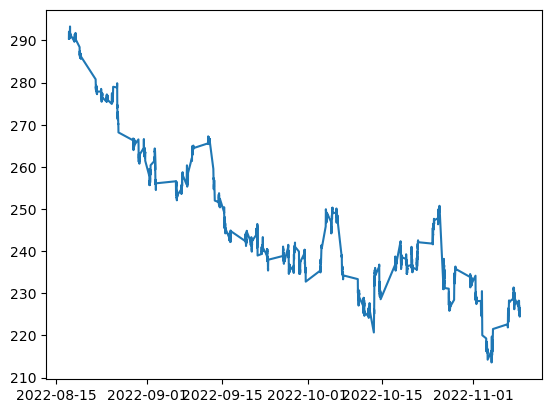

In [7]:
plt.plot(msft_hist.index, msft_hist['Close'])

In [8]:
df_msft = msft_hist.reset_index()['Close']
df_msft.head()

0    290.480011
1    290.820007
2    290.769989
3    291.410004
4    291.690002
Name: Close, dtype: float64

In [9]:
aapl = yf.Ticker("AAPL")

In [10]:
aapl_hist = aapl.history(period="60d", interval='5m')
aapl_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-08-17 09:30:00-04:00,173.250000,173.630005,173.009995,173.169998,4569900,0.0,0
2022-08-17 09:35:00-04:00,173.169998,174.130005,173.102005,173.589996,2075670,0.0,0
2022-08-17 09:40:00-04:00,173.570007,173.639999,173.149994,173.570007,1464049,0.0,0
2022-08-17 09:45:00-04:00,173.570007,174.059998,173.529999,174.029099,1355095,0.0,0
2022-08-17 09:50:00-04:00,174.029999,174.149994,173.649994,174.000000,1211123,0.0,0
...,...,...,...,...,...,...,...
2022-11-09 14:55:00-05:00,134.869995,134.880005,134.699997,134.770004,633733,0.0,0
2022-11-09 15:00:00-05:00,134.770004,135.009995,134.718506,135.009903,728070,0.0,0
2022-11-09 15:05:00-05:00,134.994995,135.479904,134.919998,135.264999,990143,0.0,0


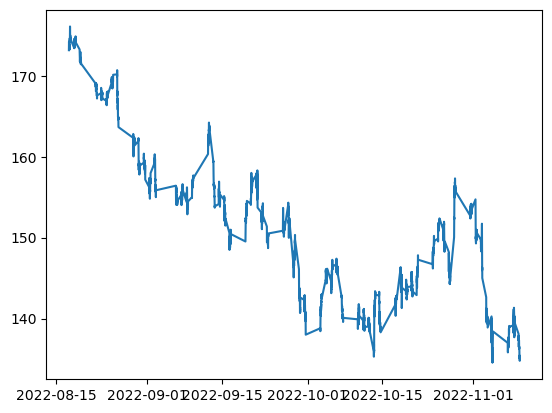

In [11]:
plt.plot(aapl_hist.index, aapl_hist['Close'])

In [12]:
df_aapl = aapl_hist.reset_index()['Close']
df_aapl.head()

0    173.169998
1    173.589996
2    173.570007
3    174.029099
4    174.000000
Name: Close, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler_msft = MinMaxScaler(feature_range=(0,1))
df1_msft = scaler_msft.fit_transform(np.array(df_msft).reshape(-1, 1))

scaler_aapl = MinMaxScaler(feature_range=(0,1))
df1_aapl = scaler_aapl.fit_transform(np.array(df_aapl).reshape(-1, 1))

In [18]:
train_size = int(len(df1_msft)*0.65)
val_size = int(len(df1_msft)*0.15)
test_size = len(df1_msft) - train_size - val_size
train_data_msft, val_data_msft, test_data_msft = df1_msft[0:train_size, :], df1_msft[train_size:train_size+val_size, :], df1_msft[train_size+val_size:len(df1_msft), :]
train_data_aapl, val_data_aapl, test_data_aapl = df1_aapl[0:train_size, :], df1_aapl[train_size:train_size+val_size, :], df1_aapl[train_size+val_size:len(df1_aapl), :]

In [19]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 60
X_train_msft, y_train_msft = create_dataset(train_data_msft, time_step)
X_val_msft, y_val_msft = create_dataset(val_data_msft, time_step)
X_test_msft, y_test_msft = create_dataset(test_data_msft, time_step)

In [22]:
time_step = 60
X_train_aapl, y_train_aapl = create_dataset(train_data_aapl, time_step)
X_val_aapl, y_val_aapl = create_dataset(val_data_aapl, time_step)
X_test_aapl, y_test_aapl = create_dataset(test_data_aapl, time_step)

In [23]:
model = tf.keras.Sequential((
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(60,1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1))
)
model.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
np.concatenate((X_train_aapl, X_train_msft)).shape

(5950, 60)

In [24]:
history1 = model.fit(
    X_train_aapl,
    y_train_aapl,
    batch_size=16,
    epochs=50,
    validation_data=(X_val_aapl, y_val_aapl),
)

Epoch 1/50
186/186 [==============================] - 15s 52ms/step - loss: 0.0083 - val_loss: 4.9350e-04
Epoch 2/50
186/186 [==============================] - 7s 36ms/step - loss: 4.6133e-04 - val_loss: 4.6580e-04
Epoch 3/50
186/186 [==============================] - 7s 37ms/step - loss: 4.4798e-04 - val_loss: 4.3034e-04
Epoch 4/50
186/186 [==============================] - 8s 45ms/step - loss: 4.2679e-04 - val_loss: 4.3723e-04
Epoch 5/50
186/186 [==============================] - 10s 52ms/step - loss: 3.5464e-04 - val_loss: 4.0351e-04
Epoch 6/50
186/186 [==============================] - 10s 56ms/step - loss: 3.4667e-04 - val_loss: 3.7047e-04
Epoch 7/50
186/186 [==============================] - 7s 35ms/step - loss: 3.2242e-04 - val_loss: 3.4074e-04
Epoch 8/50
186/186 [==============================] - 6s 34ms/step - loss: 2.8445e-04 - val_loss: 3.5612e-04
Epoch 9/50
186/186 [==============================] - 7s 36ms/step - loss: 2.6863e-04 - val_loss: 2.8018e-04
Epoch 10/50
186/186 

In [26]:
y_preds_aapl = scaler_aapl.inverse_transform(model.predict(X_test_aapl))
y_preds_aapl[:5]

array([[151.04073],
       [151.11134],
       [151.1976 ],
       [151.4333 ],
       [151.45137]], dtype=float32)

In [27]:
rmse_aapl = math.sqrt(mean_squared_error(scaler_aapl.inverse_transform(y_test_aapl.reshape(-1, 1)),y_preds_aapl))
rmse_aapl

0.4629852667684046

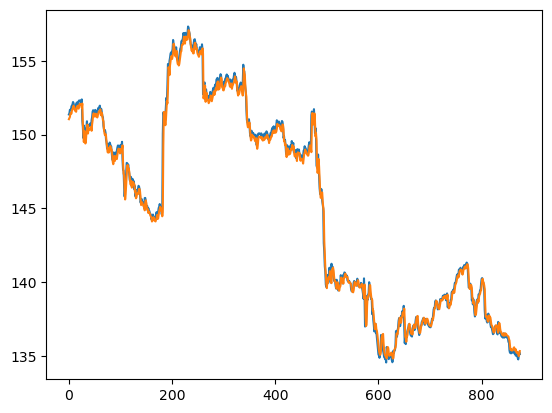

In [29]:
plt.plot(scaler_aapl.inverse_transform(y_test_aapl.reshape(-1, 1)))
plt.plot(y_preds_aapl)

In [30]:
history_msft = model.fit(
    X_train_msft,
    y_train_msft,
    batch_size=16,
    epochs=30,
    validation_data=(X_val_msft, y_val_msft),
)

Epoch 1/30
186/186 [==============================] - 10s 52ms/step - loss: 5.7532e-05 - val_loss: 6.7056e-05
Epoch 2/30
186/186 [==============================] - 11s 62ms/step - loss: 4.7056e-05 - val_loss: 6.6797e-05
Epoch 3/30
186/186 [==============================] - 7s 37ms/step - loss: 5.7802e-05 - val_loss: 6.6828e-05
Epoch 4/30
186/186 [==============================] - 8s 41ms/step - loss: 4.8443e-05 - val_loss: 7.5586e-05
Epoch 5/30
186/186 [==============================] - 7s 39ms/step - loss: 5.9946e-05 - val_loss: 6.7361e-05
Epoch 6/30
186/186 [==============================] - 8s 42ms/step - loss: 5.8637e-05 - val_loss: 6.7575e-05
Epoch 7/30
186/186 [==============================] - 6s 34ms/step - loss: 6.2174e-05 - val_loss: 6.9542e-05
Epoch 8/30
186/186 [==============================] - 7s 36ms/step - loss: 5.3712e-05 - val_loss: 7.0503e-05
Epoch 9/30
186/186 [==============================] - 7s 35ms/step - loss: 5.6022e-05 - val_loss: 6.6811e-05
Epoch 10/30
186/1

In [31]:
y_preds_msft = scaler_msft.inverse_transform(model.predict(X_test_msft))
y_preds_msft[:5]

array([[248.68945],
       [248.89906],
       [249.12073],
       [249.31808],
       [249.63985]], dtype=float32)

In [32]:
rmse_msft = math.sqrt(mean_squared_error(scaler_msft.inverse_transform(y_test_msft.reshape(-1, 1)),y_preds_msft))
rmse_msft

0.8581451853463196

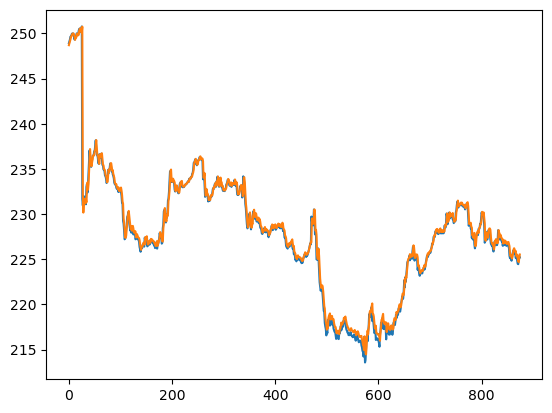

In [33]:
plt.plot(scaler_msft.inverse_transform(y_test_msft.reshape(-1, 1)))
plt.plot(y_preds_msft)

In [34]:
y_preds_aapl = scaler_aapl.inverse_transform(model.predict(X_test_aapl))
y_preds_aapl[:5]

array([[151.28294],
       [151.3502 ],
       [151.43578],
       [151.67719],
       [151.68709]], dtype=float32)

In [35]:
rmse_aapl = math.sqrt(mean_squared_error(scaler_aapl.inverse_transform(y_test_aapl.reshape(-1, 1)),y_preds_aapl))
rmse_aapl

0.44934489508592723

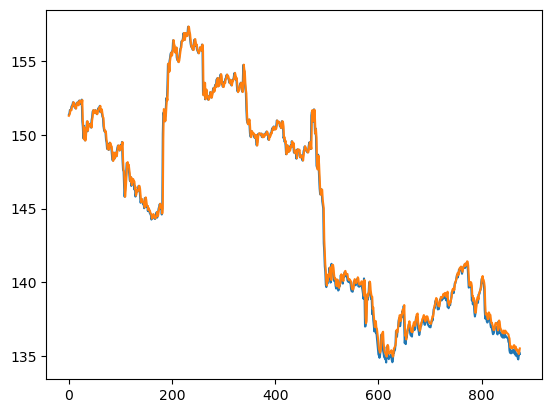

In [36]:
plt.plot(scaler_aapl.inverse_transform(y_test_aapl.reshape(-1, 1)))
plt.plot(y_preds_aapl)

In [45]:
model.save('Models')

INFO:tensorflow:Assets written to: Models\assets


INFO:tensorflow:Assets written to: Models\assets


In [47]:
model_combined = tf.keras.Sequential((
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(60,1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1))
)
model_combined.compile(loss='mean_squared_error', optimizer='adam')

In [48]:
history = model_combined.fit(
    np.concatenate((X_train_aapl, X_train_msft)),
    np.concatenate((y_train_aapl, y_train_msft)),
    batch_size=16,
    epochs=50,
    validation_data=(np.concatenate((X_val_aapl, X_val_msft)), np.concatenate((y_val_aapl, y_val_msft))),
)

Epoch 1/50
372/372 [==============================] - 18s 41ms/step - loss: 0.0048 - val_loss: 3.9241e-04
Epoch 2/50
372/372 [==============================] - 21s 55ms/step - loss: 3.4011e-04 - val_loss: 4.8886e-04
Epoch 3/50
372/372 [==============================] - 22s 58ms/step - loss: 3.0790e-04 - val_loss: 3.4552e-04
Epoch 4/50
372/372 [==============================] - 18s 47ms/step - loss: 2.6845e-04 - val_loss: 2.6537e-04
Epoch 5/50
372/372 [==============================] - 15s 40ms/step - loss: 2.2682e-04 - val_loss: 2.3561e-04
Epoch 6/50
372/372 [==============================] - 14s 38ms/step - loss: 2.0092e-04 - val_loss: 2.2787e-04
Epoch 7/50
372/372 [==============================] - 14s 37ms/step - loss: 1.6210e-04 - val_loss: 3.1119e-04
Epoch 8/50
372/372 [==============================] - 13s 36ms/step - loss: 1.6322e-04 - val_loss: 1.7622e-04
Epoch 9/50
372/372 [==============================] - 13s 35ms/step - loss: 1.3513e-04 - val_loss: 1.6753e-04
Epoch 10/50
37

In [49]:
y_preds_aapl_comb = scaler_aapl.inverse_transform(model_combined.predict(X_test_aapl))
y_preds_aapl_comb[:5]

array([[151.4144 ],
       [151.4761 ],
       [151.55667],
       [151.79684],
       [151.79099]], dtype=float32)

In [51]:
y_preds_msft_comb = scaler_msft.inverse_transform(model_combined.predict(X_test_msft))
y_preds_msft_comb[:5]

array([[248.91331],
       [249.11577],
       [249.32428],
       [249.51169],
       [249.82874]], dtype=float32)

In [55]:
rmse_aapl_comb = math.sqrt(mean_squared_error(scaler_aapl.inverse_transform(y_test_aapl.reshape(-1, 1)),y_preds_aapl_comb))
rmse_aapl_comb

0.4705631106622622

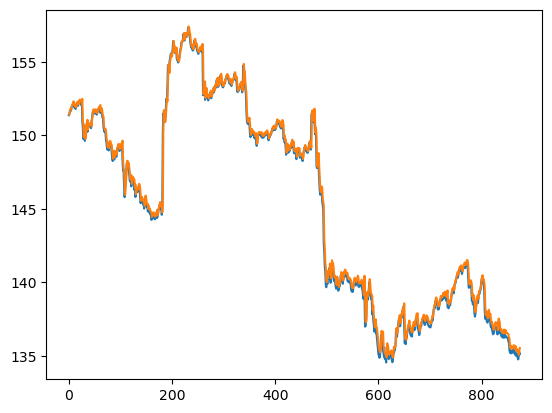

In [53]:
plt.plot(scaler_aapl.inverse_transform(y_test_aapl.reshape(-1, 1)))
plt.plot(y_preds_aapl_comb)

In [54]:
rmse_msft_comb = math.sqrt(mean_squared_error(scaler_msft.inverse_transform(y_test_msft.reshape(-1, 1)),y_preds_msft_comb))
rmse_msft_comb

0.9192496648058913

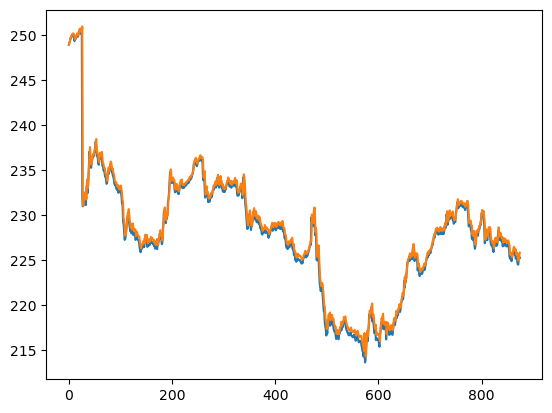

In [56]:
plt.plot(scaler_msft.inverse_transform(y_test_msft.reshape(-1, 1)))
plt.plot(y_preds_msft_comb)

In [57]:
model_combined.save('model_combined')

INFO:tensorflow:Assets written to: model_combined\assets


INFO:tensorflow:Assets written to: model_combined\assets
